# Freiburg Notebook

## Imports and General Definitions

In [5]:
# Freiburg dataset import
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:.0f}'.format
base_colors = ['#e97c6b', '#f7a18a', '#00a78d', '#59c3ad', '#1c352d', '#49916b', '#c2a1b5', '#d6b3c5']

In [6]:
#Freiburg Bikes Sets
freiburg_dataset = "./Freiburg_bikes.csv"
df_freiburg = pd.read_csv(freiburg_dataset)

#df_freiburg.shape #(245472, 5)
df_freiburg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245472 entries, 0 to 245471
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Datum               245472 non-null  object
 1   Stunde              245472 non-null  int64 
 2   Datetime            245472 non-null  object
 3   Fahrrad-Zählstelle  245472 non-null  int64 
 4   Anzahl Fahrräder    245472 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 9.4+ MB


In [7]:
# I want to drop the column Datetime because it is redundant
df_freiburg = df_freiburg.drop(columns='Datetime')

# I also want to sort my DataFrame, depending on the "Datum" column and also by the "Stunde" column
df_freiburg = df_freiburg.sort_values(by=['Datum','Stunde'], ascending=[True, True])

#df_freiburg.info()
print(df_freiburg)

             Datum  Stunde  Fahrrad-Zählstelle  Anzahl Fahrräder
19992   2015-01-01       0                   1                16
91418   2015-01-01       0                   2                 8
92107   2015-01-01       0                   3                 6
127925  2015-01-01       0                   4                18
19993   2015-01-01       1                   1                41
...            ...     ...                 ...               ...
237802  2021-12-31      22                   4                76
78783   2021-12-31      23                   1                47
79682   2021-12-31      23                   2                17
232337  2021-12-31      23                   3                37
243657  2021-12-31      23                   4                76

[245472 rows x 4 columns]


In [8]:
# Reset the index of the DataFrame to a continuous sequence starting from 0 to the last value using the reset_index() method with the parameter drop=True.
df_freiburg.reset_index(drop=True, inplace=True)
#print(df_freiburg)
#df_freiburg.info()

### Monthly Count per Location

#### Fist with same Y-Axis limits for all plots

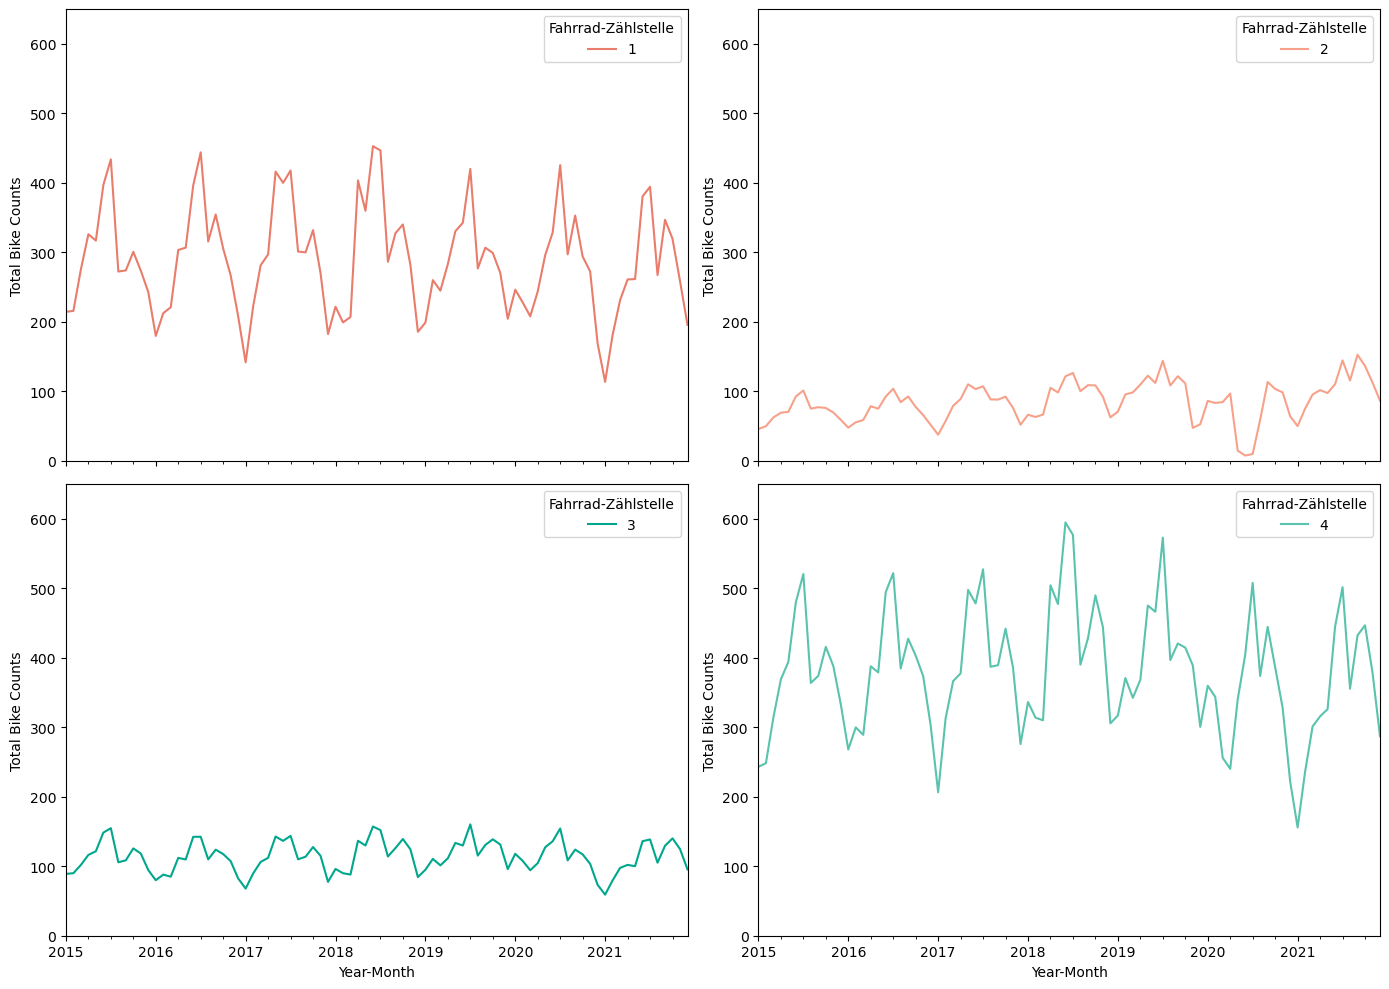

In [10]:
# Convert 'Datum' column to datetime
df_freiburg['Datum'] = pd.to_datetime(df_freiburg['Datum'])

# Create a new DataFrame with year-month ('YYYY-MM') values
df_monthly = df_freiburg.copy()
df_monthly['Datum'] = df_monthly['Datum'].dt.to_period('M')

# Group by 'Datum' and 'Fahrrad-Zählstelle' and sum the 'Anzahl Fahrräder' values
#df_monthly = df_monthly.groupby(['Datum', 'Fahrrad-Zählstelle']).agg({'Anzahl Fahrräder': 'sum'}).reset_index()
df_monthly_counts = df_monthly.groupby(['Datum', 'Fahrrad-Zählstelle'])['Anzahl Fahrräder'].sum().reset_index()

# Print the new DataFrame
#print(df_monthly)

# lets try line plot over time

df_pivot = df_monthly.pivot_table(index='Datum', columns='Fahrrad-Zählstelle', values='Anzahl Fahrräder')
# Plot each 'Fahrrad-Zählstelle' as a line in a separate subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

for i, (column, data) in enumerate(df_pivot.items()):
    ax = axs[i // 2, i % 2]
    data.plot(ax=ax, legend=True, color=base_colors[i])
    #ax.set_title(column)
    ax.set_ylabel('Total Bike Counts')
    ax.set_xlabel('Year-Month')
    ax.legend(title='Fahrrad-Zählstelle')
    ax.set_ylim(0,650)

plt.tight_layout()
plt.show()

#### Individual limits for each plot, to see the seasonal pattern better

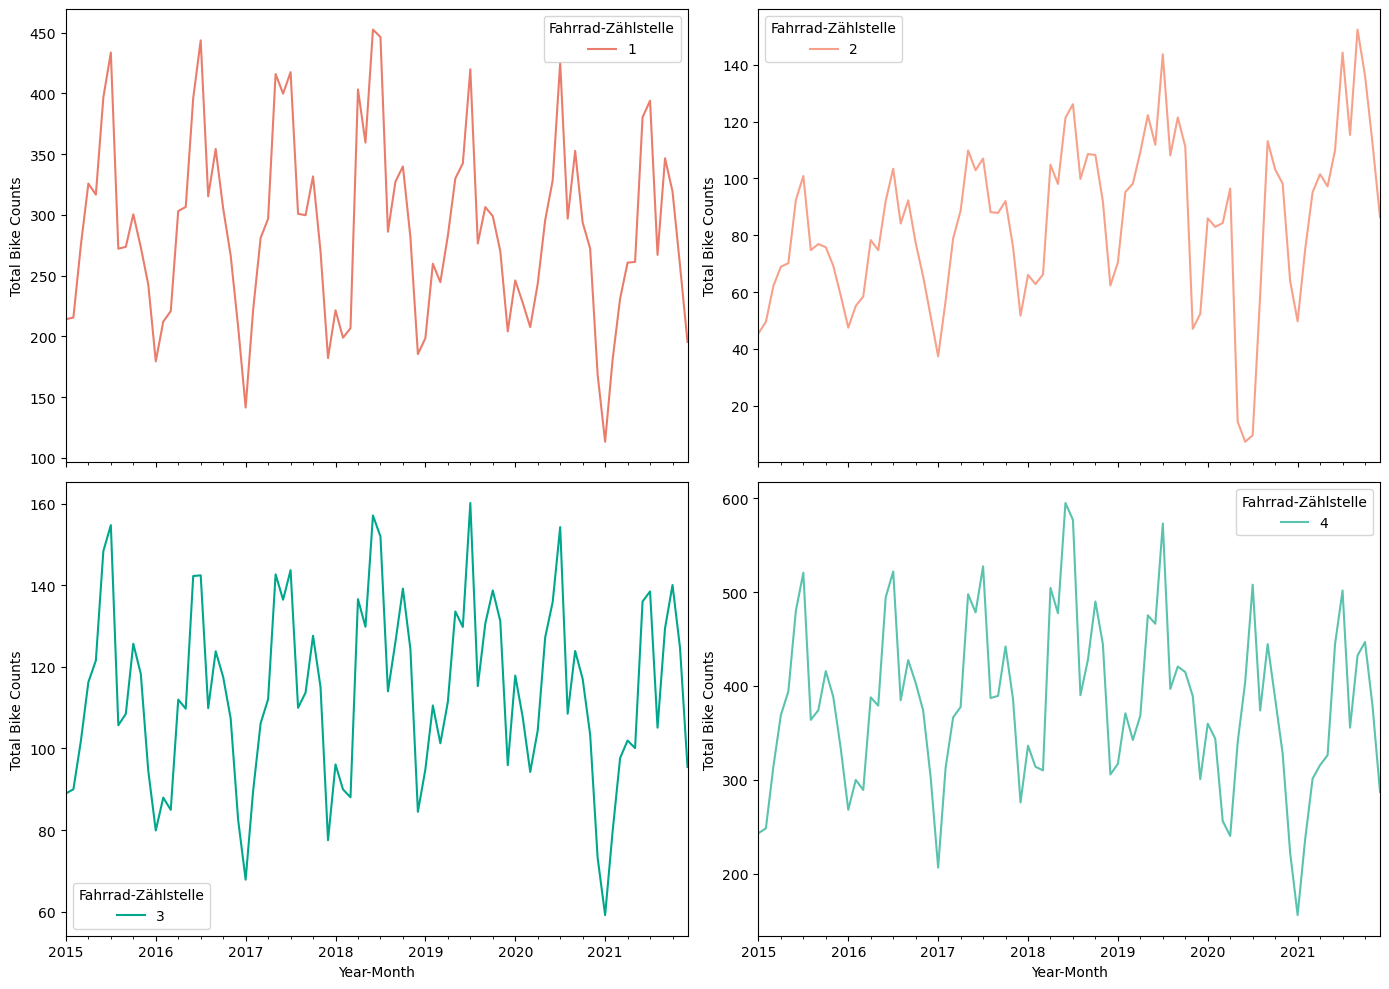

In [11]:
# Convert 'Datum' column to datetime
df_freiburg['Datum'] = pd.to_datetime(df_freiburg['Datum'])

# Create a new DataFrame with year-month ('YYYY-MM') values
df_monthly = df_freiburg.copy()
df_monthly['Datum'] = df_monthly['Datum'].dt.to_period('M')

# Group by 'Datum' and 'Fahrrad-Zählstelle' and sum the 'Anzahl Fahrräder' values
#df_monthly = df_monthly.groupby(['Datum', 'Fahrrad-Zählstelle']).agg({'Anzahl Fahrräder': 'sum'}).reset_index()
df_monthly_counts = df_monthly.groupby(['Datum', 'Fahrrad-Zählstelle'])['Anzahl Fahrräder'].sum().reset_index()

# Print the new DataFrame
#print(df_monthly)

# lets try line plot over time

df_pivot = df_monthly.pivot_table(index='Datum', columns='Fahrrad-Zählstelle', values='Anzahl Fahrräder')
# Plot each 'Fahrrad-Zählstelle' as a line in a separate subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

for i, (column, data) in enumerate(df_pivot.items()):
    ax = axs[i // 2, i % 2]
    data.plot(ax=ax, legend=True, color=base_colors[i])
    #ax.set_title(column)
    ax.set_ylabel('Total Bike Counts')
    ax.set_xlabel('Year-Month')
    ax.legend(title='Fahrrad-Zählstelle')

plt.tight_layout()
plt.show()

### Yearly Count per Location

In [12]:
# Convert 'Datum' column to datetime
#df_freiburg['Datum'] = pd.to_datetime(df_freiburg['Datum'])

# Create a new DataFrame with year-month ('YYYY-MM') values
df_yearly = df_freiburg.copy()
df_yearly['Datum'] = df_yearly['Datum'].dt.to_period('Y')
#print(df_yearly)
# Group by 'Datum' and 'Fahrrad-Zählstelle' and sum the 'Anzahl Fahrräder' values
df_yearly = df_yearly.groupby(['Datum', 'Fahrrad-Zählstelle']).agg({'Anzahl Fahrräder': 'sum'}).reset_index()

# Print the new DataFrame
#print(df_yearly)

<Figure size 1000x700 with 0 Axes>

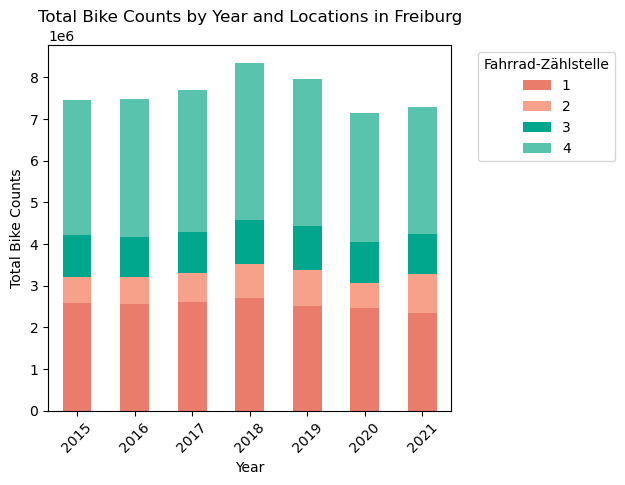

In [13]:
# Group by 'Datum' (year) and sum the 'Anzahl Fahrräder' values for each year
df_yearly_total = df_yearly.groupby('Datum')['Anzahl Fahrräder'].sum().reset_index()

# Pivot the DataFrame to have 'Fahrrad-Zählstelle' as columns and 'Datum' as index
df_pivot = df_yearly.pivot_table(index='Datum', columns='Fahrrad-Zählstelle', values='Anzahl Fahrräder', aggfunc='sum')

# Plot the stacked bar chart
plt.figure(figsize=(10, 7))
df_pivot.plot(kind='bar', stacked=True, color=base_colors)
plt.title('Total Bike Counts by Year and Locations in Freiburg')
plt.xlabel('Year')
plt.ylabel('Total Bike Counts')
plt.xticks(rotation=45)
plt.legend(title='Fahrrad-Zählstelle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
# Read the CSV file into a DataFrame
df_f_weather = pd.read_csv('FreiburgWeather.csv')

# Convert the 'MESS_DATUM' column to datetime format
df_f_weather['MESS_DATUM'] = pd.to_datetime(df_f_weather['MESS_DATUM'], format='%Y%m%d%H')

# Display the DataFrame
print(df_f_weather)

# Save the DataFrame to a CSV file
df_f_weather.to_csv('FreiburgWeatherData.csv', index=False)


        STATIONS_ID          MESS_DATUM  QN_4  TT_TER  RF_TER  eor
0              1443 1874-01-01 07:00:00     1       5      78  eor
1              1443 1874-01-01 14:00:00     1       3      97  eor
2              1443 1874-01-01 21:00:00     1       4      98  eor
3              1443 1874-01-02 07:00:00     1       2     100  eor
4              1443 1874-01-02 14:00:00     1       4      91  eor
...             ...                 ...   ...     ...     ...  ...
133845         1443 2022-12-31 00:00:00     3      17      62  eor
133846         1443 2022-12-31 06:00:00     3      15      71  eor
133847         1443 2022-12-31 12:00:00     3    -999    -999  eor
133848         1443 2022-12-31 18:00:00     3    -999    -999  eor
133849         1443 2023-01-01 00:00:00     3    -999    -999  eor

[133850 rows x 6 columns]


In [21]:
df_f_weather_grouped = df_f_weather.groupby(df_f_weather['MESS_DATUM'].dt.date).agg({
    'TT_TER': ['min', 'max']
}).reset_index()

df_f_weather_grouped.columns = ['date', 'min.temp', 'max.temp']

print(df_f_weather_grouped)


             date  min.temp  max.temp
0      1874-01-01         3         5
1      1874-01-02         2         4
2      1874-01-03         4         7
3      1874-01-04         3         6
4      1874-01-05         2         3
...           ...       ...       ...
44404  2022-12-28         3        12
44405  2022-12-29        12        14
44406  2022-12-30         6        15
44407  2022-12-31      -999        17
44408  2023-01-01      -999      -999

[44409 rows x 3 columns]


In [24]:
# Convert the 'date' column in df_f_w_g to datetime
df_f_w_g['date'] = pd.to_datetime(df_f_w_g['date'])

# Filter df_f_w_g to include only dates equal to or after 2015-01-01
start_date = pd.to_datetime('2015-01-01')
df_f_w_g_filtered = df_f_w_g[df_f_w_g['date'] >= start_date]

# Perform the join based on the 'Datum' column
merged_df = pd.merge(df_f_w_g_filtered, df_freiburg, left_on='date', right_on='Datum')

# Drop the duplicate 'Datum' column
merged_df.drop(columns=['Datum'], inplace=True)

print(merged_df)


             date  min.temp  max.temp  Stunde  Fahrrad-Zählstelle  \
0      2015-01-01        -5        -2       0                   1   
1      2015-01-01        -5        -2       0                   2   
2      2015-01-01        -5        -2       0                   3   
3      2015-01-01        -5        -2       0                   4   
4      2015-01-01        -5        -2       1                   1   
...           ...       ...       ...     ...                 ...   
245371 2021-12-31         4        14      22                   4   
245372 2021-12-31         4        14      23                   1   
245373 2021-12-31         4        14      23                   2   
245374 2021-12-31         4        14      23                   3   
245375 2021-12-31         4        14      23                   4   

        Anzahl Fahrräder  
0                     16  
1                      8  
2                      6  
3                     18  
4                     41  
...      

In [25]:
# Group by 'date' and aggregate the other columns
aggregated_df = merged_df.groupby('date').agg({
    'min.temp': 'first',               # Keep the first value of 'min.temp'
    'max.temp': 'first',               # Keep the first value of 'max.temp'
    'Anzahl Fahrräder': 'sum'         # Sum the values of 'Anzahl Fahrräder'
}).reset_index()                      # Reset index to make 'date' a column again

print(aggregated_df)


           date  min.temp  max.temp  Anzahl Fahrräder
0    2015-01-01        -5        -2              2300
1    2015-01-02        -7         6              4117
2    2015-01-03         1        11              5169
3    2015-01-04         1         5              5695
4    2015-01-05        -5         4             12073
...         ...       ...       ...               ...
2551 2021-12-27      -999        10              8831
2552 2021-12-28        11        13              9048
2553 2021-12-29         9        13              9075
2554 2021-12-30        14        15             13104
2555 2021-12-31         4        14             11125

[2556 rows x 4 columns]
